In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re

In [2]:
test=pd.read_csv('A:/Data Science/vidya/Sep 17/test.csv')
train=pd.read_csv('A:/Data Science/vidya/Sep 17/TRAIN.csv')

In [3]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
train.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00


In [10]:
train.shape

(188340, 10)

In [11]:
train.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [12]:
from datetime import datetime,time

In [13]:
train.index=pd.to_datetime(train.Date)

In [14]:
train['DATE'] = pd.to_datetime(train['Date'])
train['day'] =train['DATE'].dt.day
train['month'] =train['DATE'].dt.month
train['year']=train['DATE'].dt.year

In [15]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,DATE,day,month,year
Date,,,,,,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018-01-01,1,1,2018
2018-01-01,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018-01-01,1,1,2018
2018-01-01,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018-01-01,1,1,2018
2018-01-01,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018-01-01,1,1,2018
2018-01-01,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018-01-01,1,1,2018


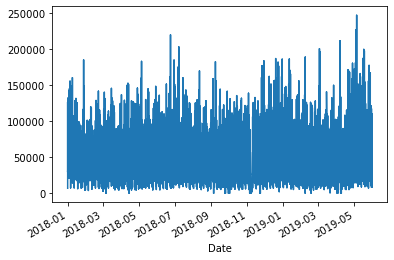

In [39]:
train.Sales.plot()

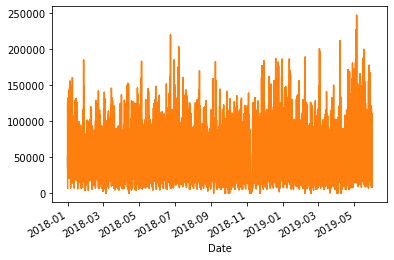

In [45]:
#Moving average to understand the trend
list=[24]
for i in list:
    train['Sales'].rolling(i).mean().plot(label=str(i))

train.Sales.plot()

In [ ]:
#SARIMA model
import statsmodels.api as sm
model_sm=sm.tsa.statespace.SARIMAX(train.Sales,order=(8,1,1),seasonal_order=(1,1,1,12)).fit()
forecast=model_sm.predict(start=test.index[0],end=test.index[-1],dynamic=True)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

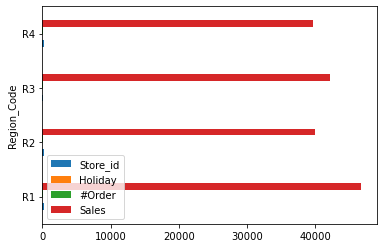

In [13]:
train.groupby(by=train.Region_Code).mean().plot(kind='barh')

In [17]:
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [58]:
train.ID=train.ID.apply(lambda x:re.sub('\D','',x))
train.Store_Type=train.Store_Type.apply(lambda x:re.sub('\D','',x))
train.Location_Type=train.Location_Type.apply(lambda x:re.sub('\D','',x))
train.Region_Code=train.Region_Code.apply(lambda x:re.sub('\D','',x))

In [59]:
train.Discount=train.Discount.map({'Yes':1,'No':0})

In [60]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1000001,1,1,3,1,2018-01-01,1,1,9,7011.84
1,1000002,253,4,2,1,2018-01-01,1,1,60,51789.12
2,1000003,252,3,2,1,2018-01-01,1,1,42,36868.20
3,1000004,251,2,3,1,2018-01-01,1,1,23,19715.16
4,1000005,250,2,3,4,2018-01-01,1,1,62,45614.52


In [46]:
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount           int64
#Order             int64
Sales            float64
dtype: object

In [27]:
train.Store_Type.value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [28]:
train.Location_Type.value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [29]:
train.Region_Code.value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [61]:
obj_col=train.select_dtypes(include=['object'])
obj_col

,ID,Store_Type,Location_Type,Region_Code,Date
0,1000001,1,3,1,2018-01-01
1,1000002,4,2,1,2018-01-01
2,1000003,3,2,1,2018-01-01
3,1000004,2,3,1,2018-01-01
4,1000005,2,3,4,2018-01-01
...,...,...,...,...,...
188335,1188336,2,3,2,2019-05-31
188336,1188337,4,2,1,2019-05-31
188337,1188338,1,3,2,2019-05-31
188338,1188339,3,1,2,2019-05-31


In [62]:
train['Date'] = pd.to_datetime(train['Date'])

In [63]:
train['DATE'] = pd.to_datetime(train['Date'])
train['day'] =train['Date'].dt.day
train['month'] =train['Date'].dt.month
train['year']=train['Date'].dt.year

In [52]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,day,month,year
0,1000001,1,1,3,1,2018-01-01,1,1,9,7011.84,1,1,2018
1,1000002,253,4,2,1,2018-01-01,1,1,60,51789.12,1,1,2018
2,1000003,252,3,2,1,2018-01-01,1,1,42,36868.20,1,1,2018
3,1000004,251,2,3,1,2018-01-01,1,1,23,19715.16,1,1,2018
4,1000005,250,2,3,4,2018-01-01,1,1,62,45614.52,1,1,2018


In [64]:
train.drop(['DATE'],axis=1,inplace=True)

In [65]:
train.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                  int64
#Order                    int64
Sales                   float64
day                       int64
month                     int64
year                      int64
dtype: object

In [66]:
obj_col=train.select_dtypes(include=['object'])
obj_col

,ID,Store_Type,Location_Type,Region_Code
0,1000001,1,3,1
1,1000002,4,2,1
2,1000003,3,2,1
3,1000004,2,3,1
4,1000005,2,3,4
...,...,...,...,...
188335,1188336,2,3,2
188336,1188337,4,2,1
188337,1188338,1,3,2
188338,1188339,3,1,2


In [68]:
obj_col=obj_col.astype('int64')

In [69]:
obj_col.dtypes

ID               int64
Store_Type       int64
Location_Type    int64
Region_Code      int64
dtype: object

In [70]:
int_col=train.select_dtypes(include=['int64','float64'])
int_col

,Store_id,Holiday,Discount,#Order,Sales,day,month,year
0,1,1,1,9,7011.84,1,1,2018
1,253,1,1,60,51789.12,1,1,2018
2,252,1,1,42,36868.20,1,1,2018
3,251,1,1,23,19715.16,1,1,2018
4,250,1,1,62,45614.52,1,1,2018
...,...,...,...,...,...,...,...,...
188335,149,1,1,51,37272.00,31,5,2019
188336,153,1,0,90,54572.64,31,5,2019
188337,154,1,0,56,31624.56,31,5,2019
188338,155,1,1,70,49162.41,31,5,2019


In [77]:
train_df1=pd.concat([obj_col,int_col],axis=1)
train_df=train_df1.copy()

In [78]:
train_df1.head()

,ID,Store_Type,Location_Type,Region_Code,Store_id,Holiday,Discount,#Order,Sales,day,month,year
0,1000001,1,3,1,1,1,1,9,7011.84,1,1,2018
1,1000002,4,2,1,253,1,1,60,51789.12,1,1,2018
2,1000003,3,2,1,252,1,1,42,36868.20,1,1,2018
3,1000004,2,3,1,251,1,1,23,19715.16,1,1,2018
4,1000005,2,3,4,250,1,1,62,45614.52,1,1,2018


In [79]:
train_df.drop(['#Order'],axis=1,inplace=True)

In [80]:
train_df.head()

,ID,Store_Type,Location_Type,Region_Code,Store_id,Holiday,Discount,Sales,day,month,year
0,1000001,1,3,1,1,1,1,7011.84,1,1,2018
1,1000002,4,2,1,253,1,1,51789.12,1,1,2018
2,1000003,3,2,1,252,1,1,36868.20,1,1,2018
3,1000004,2,3,1,251,1,1,19715.16,1,1,2018
4,1000005,2,3,4,250,1,1,45614.52,1,1,2018


In [83]:
train_df.dtypes

ID                 int64
Store_Type         int64
Location_Type      int64
Region_Code        int64
Store_id           int64
Holiday            int64
Discount           int64
Sales            float64
day                int64
month              int64
year               int64
dtype: object

In [86]:
train_df.columns

Index(['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Store_id',
       'Holiday', 'Discount', 'Sales', 'day', 'month', 'year'],
      dtype='object')

In [102]:
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error

In [87]:

X=train_df[[ 'ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Store_id',
       'Holiday', 'Discount',  'day', 'month', 'year']]
y=train_df[['Sales']]

In [91]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [96]:
y_train.dtypes

Sales    float64
dtype: object

In [99]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
predict=model.predict(x_test)

In [103]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,predict))))

RMSE 8.970236775953152


In [104]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predict)
print(r2)


0.8204405174734652


In [105]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [106]:
test.ID=test.ID.apply(lambda x:re.sub('\D','',x))
test.Store_Type=test.Store_Type.apply(lambda x:re.sub('\D','',x))
test.Location_Type=test.Location_Type.apply(lambda x:re.sub('\D','',x))
test.Region_Code=test.Region_Code.apply(lambda x:re.sub('\D','',x))

In [107]:
test.Discount=test.Discount.map({'Yes':1,'No':0})
test['Date'] = pd.to_datetime(test['Date'])

test['day'] =test['Date'].dt.day
test['month'] =test['Date'].dt.month
test['year']=test['Date'].dt.year

In [108]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,day,month,year
0,1188341,171,4,2,3,2019-06-01,0,0,1,6,2019
1,1188342,172,1,1,1,2019-06-01,0,0,1,6,2019
2,1188343,173,4,2,1,2019-06-01,0,0,1,6,2019
3,1188344,174,1,1,4,2019-06-01,0,0,1,6,2019
4,1188345,170,1,1,2,2019-06-01,0,0,1,6,2019


In [110]:

obj_col_test=test.select_dtypes(include=['object'])
int_col_test=test.select_dtypes(include=['int64','float64'])

In [114]:
obj_col_test=obj_col_test.astype('int64')

In [115]:
test_df=pd.concat([obj_col_test,int_col_test],axis=1)
test_df

,ID,Store_Type,Location_Type,Region_Code,Store_id,Holiday,Discount,day,month,year
0,1188341,4,2,3,171,0,0,1,6,2019
1,1188342,1,1,1,172,0,0,1,6,2019
2,1188343,4,2,1,173,0,0,1,6,2019
3,1188344,1,1,4,174,0,0,1,6,2019
4,1188345,1,1,2,170,0,0,1,6,2019
...,...,...,...,...,...,...,...,...,...,...
22260,1210601,2,5,2,186,0,0,31,7,2019
22261,1210602,4,2,1,11,0,0,31,7,2019
22262,1210603,1,1,3,185,0,1,31,7,2019
22263,1210604,1,1,4,69,0,0,31,7,2019


In [116]:
test_df.dtypes

ID               int64
Store_Type       int64
Location_Type    int64
Region_Code      int64
Store_id         int64
Holiday          int64
Discount         int64
day              int64
month            int64
year             int64
dtype: object

In [117]:
predict_test=model.predict(test_df)

In [121]:
sales=pd.Series(predict_test)
sales

0        60428.667969
1        45023.652344
2        83396.523438
3        43895.496094
4        49466.363281
             ...     
22260    22405.265625
22261    60797.316406
22262    51361.964844
22263    34595.839844
22264    36240.828125
Length: 22265, dtype: float32

In [122]:
sales.to_csv('A:/Data Science/vidya/Sep 17/sub2.csv')

In [127]:
k=pd.concat([train.Date,train.Sales],axis=1)
k['Date']=pd.to_datetime(k.Date)

In [130]:
k.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object